###Experiment 2

Name - Khushi Jashnani

UID - 2018130017

###**Objective**: To implement and use Principal Component Analysis using Python Platform

#### **Case study** : 

Auto-MPG prediction – Use Linear Regression to build a Model to predict the mpg of cars in terms of 3 multivalued discrete and 5 continuous
attributes.


#### **Outcomes** :

1. To learn how PCA is to identify an underlying structure or pattern beneath set of multivariate data.

2. To interpret the results of evaluated components

### Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [199]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [200]:
# Connecting/Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
%cd drive/MyDrive/Colab Notebooks/DS/Labs/Exp1

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/DS/Labs/Exp1'
/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1/Auto-mpg


In [202]:
%cd Auto-mpg

[Errno 2] No such file or directory: 'Auto-mpg'
/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1/Auto-mpg


1. Load the dataset (Use pandas )

In [203]:
# Reading the training dataset
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [204]:
# Renaming the following mispelled brands into proper names
auto_misspelled = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}

# Spliting the car name into brand and name columns respectively
data['brand'] = [auto_misspelled[key].title() if key in auto_misspelled else \
               key.title() for key in [i.split()[0] for i in data['car name']]]

data['name'] = [' '.join(i.split()[1:]).title() for i in data['car name']]
data = data.drop(columns = 'car name', axis = 0)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford,Torino


2. and 3. Exploratory Data Analysis of the dataset and Data Preprocessing (Handling NA values)

In [205]:
# Checking the shape of the dataset
data.shape

(398, 10)

In [206]:
# Check for null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
brand           0
name            0
dtype: int64

In [207]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


In [208]:
data.describe()  

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [209]:
# Classifying the features as discrete and continuous features
discrete_columns = []
continuous_columns = []
for x in data.columns :
    if data[x].nunique() < 10 or x in ["name", "brand"]:
        discrete_columns.append(x)
    else:
        continuous_columns.append(x)
print("Discrete columns : ", discrete_columns)
print("Continuous columns : ", continuous_columns)

Discrete columns :  ['cylinders', 'origin', 'brand', 'name']
Continuous columns :  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


In [210]:
# Checking frequency of unqiue values in each column
for col in discrete_columns:
    print("Unique values in ", col," - ",data[col].nunique())

Unique values in  cylinders  -  5
Unique values in  origin  -  3
Unique values in  brand  -  30
Unique values in  name  -  300


The first three seem good for a categorical column but the name has too many classes which for approximately every new instance, so we can drop it in the end

In [211]:
# Checking for unqiue values in each column
for col in discrete_columns:
    print(data[col].value_counts())

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64
Ford          51
Chevrolet     47
Plymouth      31
Amc           28
Dodge         28
Toyota        26
Datsun        23
Volkswagen    22
Buick         17
Pontiac       16
Honda         13
Mazda         12
Mercury       11
Oldsmobile    10
Fiat           8
Peugeot        8
Audi           7
Volvo          6
Chrysler       6
Renault        5
Saab           4
Opel           4
Subaru         4
Mercedes       3
Cadillac       2
Bmw            2
Capri          1
Harvester      1
Triumph        1
Nissan         1
Name: brand, dtype: int64
Pinto         6
Rabbit        5
Maverick      5
Corolla       5
Matador       5
             ..
Monza 2+2     1
Mustang Ii    1
Astro         1
Pacer         1
S-10          1
Name: name, Length: 300, dtype: int64


In [212]:
# Checking the continuous variables
data[continuous_columns]

,mpg,displacement,horsepower,weight,acceleration,model year
0,18.0,307.0,130,3504,12.0,70
1,15.0,350.0,165,3693,11.5,70
2,18.0,318.0,150,3436,11.0,70
3,16.0,304.0,150,3433,12.0,70
4,17.0,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,82
394,44.0,97.0,52,2130,24.6,82
395,32.0,135.0,84,2295,11.6,82
396,28.0,120.0,79,2625,18.6,82


We see a few ? in the column of horse power.

Let's see in detail

In [213]:
# Checking the frequency of unique values in horsepower column
data[data['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
32,25.0,4,98.0,?,2046,19.0,71,1,Ford,Pinto
126,21.0,6,200.0,?,2875,17.0,74,1,Ford,Maverick
330,40.9,4,85.0,?,1835,17.3,80,2,Renault,Lecar Deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,Ford,Mustang Cobra
354,34.5,4,100.0,?,2320,15.8,81,2,Renault,18I
374,23.0,4,151.0,?,3035,20.5,82,1,Amc,Concord Dl


So there are 6 instances with ? in the horsepower column

In [214]:
# Imputing the missing values in it with 0
data.loc[data['horsepower'] == "?", 'horsepower'] = 0

In [215]:
data['horsepower'].value_counts().to_frame()

,horsepower
150,22
90,20
88,19
110,18
100,17
...,...
61,1
93,1
148,1
152,1


In [216]:
# Converting the type of horsepower column from object to numeric i.e float
data.loc[:, 'horsepower'] = pd.to_numeric(data.loc[:, 'horsepower'])

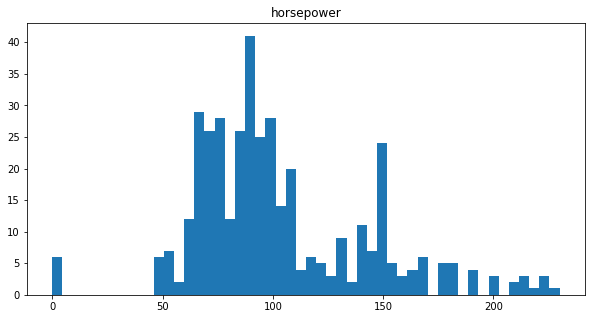

In [217]:
# Seeing the distribution of continuous column
plt.figure(figsize=(10,5))
plt.hist(data['horsepower'], bins=50)
plt.title('horsepower')
plt.show()

But this is forming an outlier, so lets impute it with an median

In [218]:
# Calculating the median value
pd.to_numeric(data.loc[data['horsepower'] != 0, 'horsepower']).median()

93.5

Inputing the horse power column with the median

In [219]:
data.loc[data['horsepower'] == 0, 'horsepower'] = pd.to_numeric(data.loc[data['horsepower'] != 0, 'horsepower']).median()

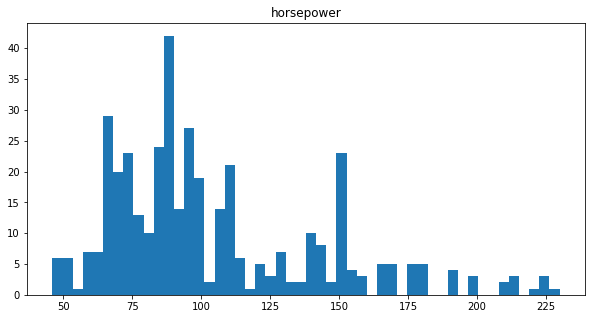

In [220]:
plt.figure(figsize=(10,5))
plt.hist(data['horsepower'], bins=50)
plt.title('horsepower')
plt.show()

In [221]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,Ford,Torino


Now, lets check for some outliers in continuous columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


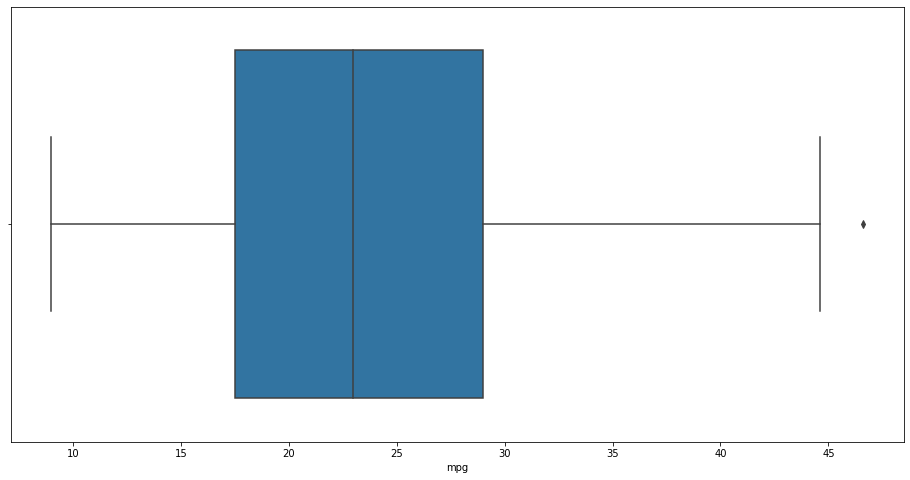

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


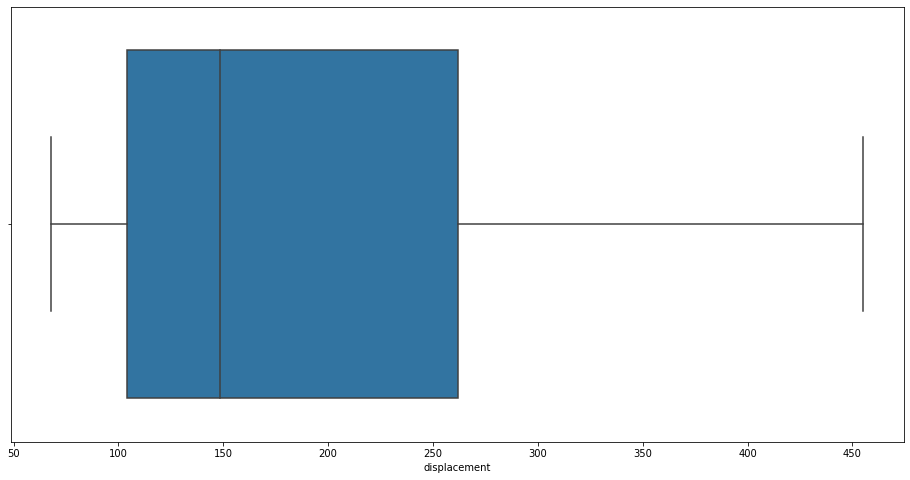

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


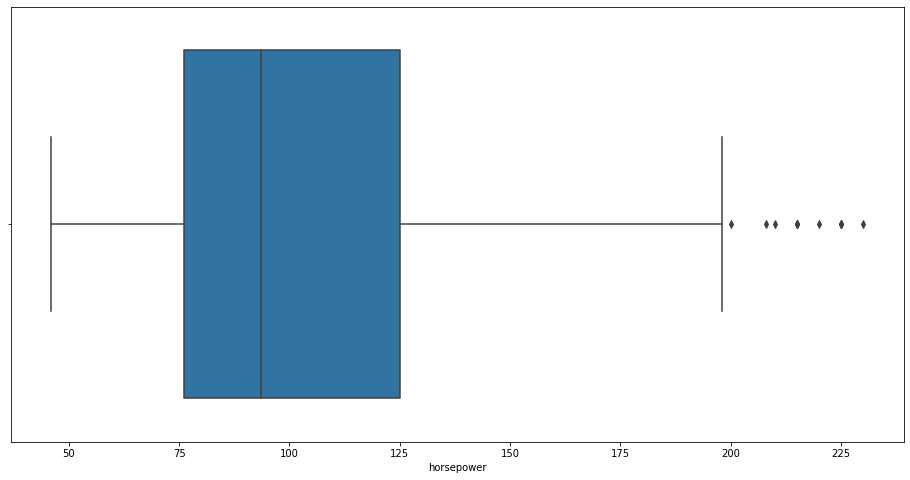

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


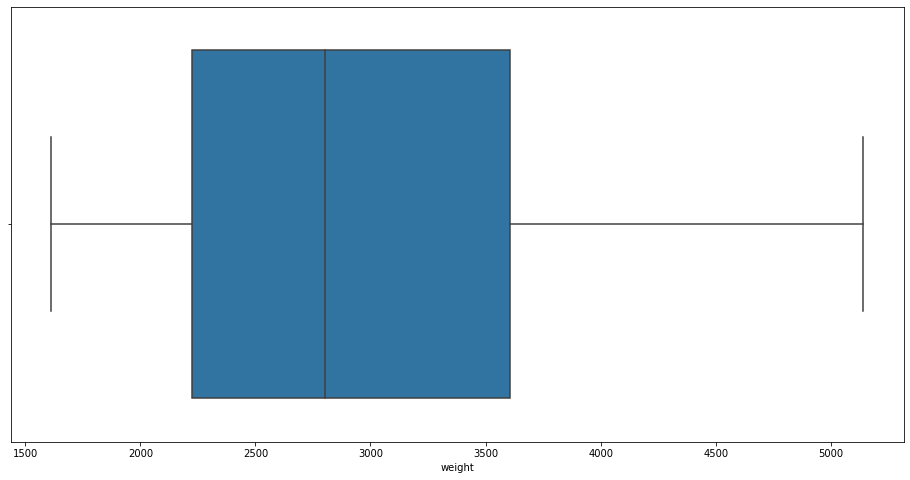

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


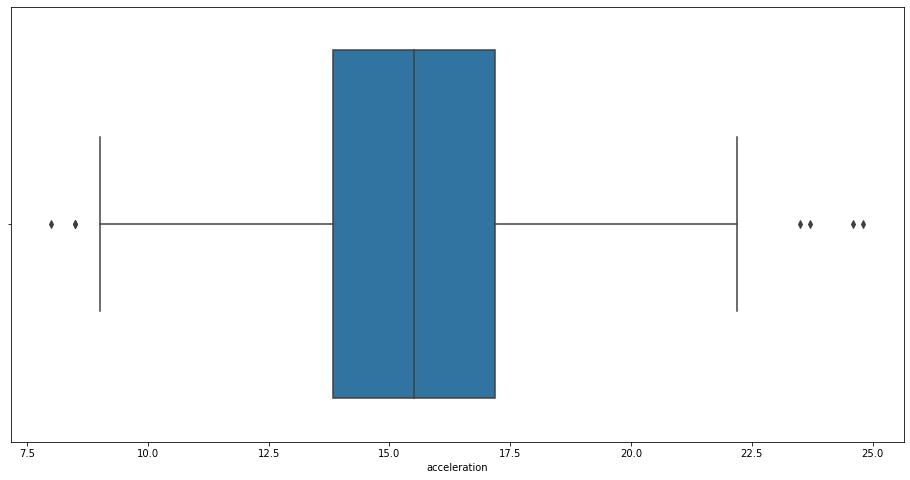

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


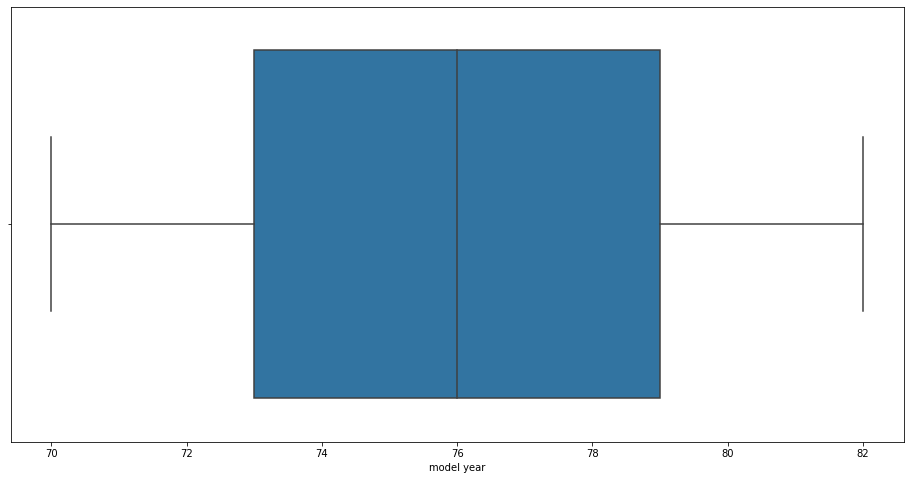

In [222]:
# Checking for outliers in these columns by plotting the boxplot
for x in continuous_columns:
    plt.figure(figsize=(16,8))
    sns.boxplot(data[x])
    plt.show()

Here, we see that apart from model year, every column is a continuous column

Let's check their histograms

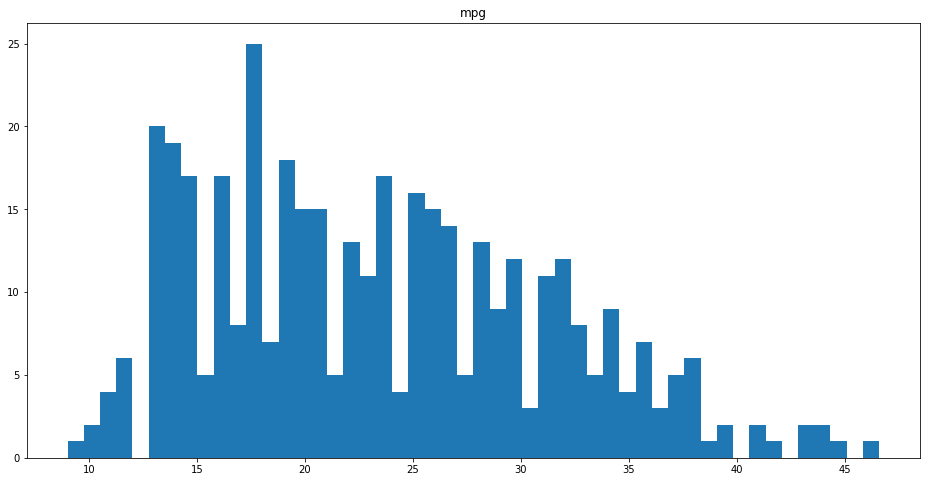

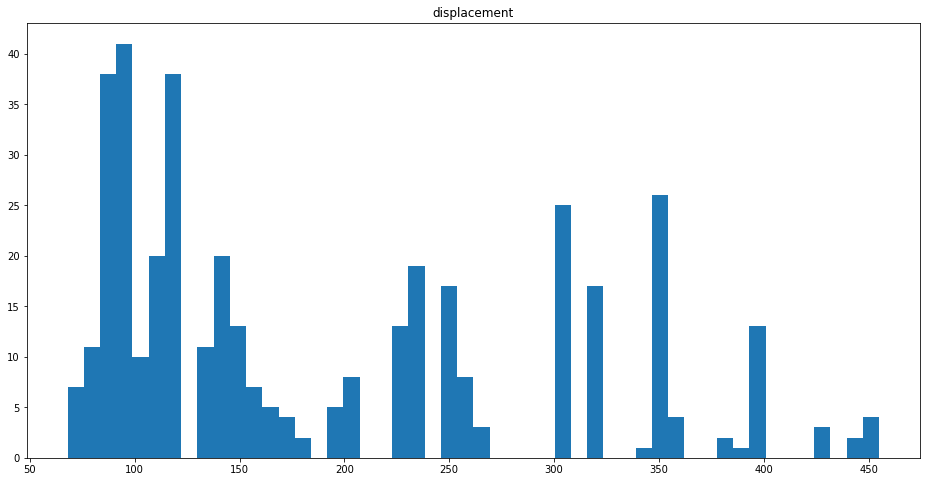

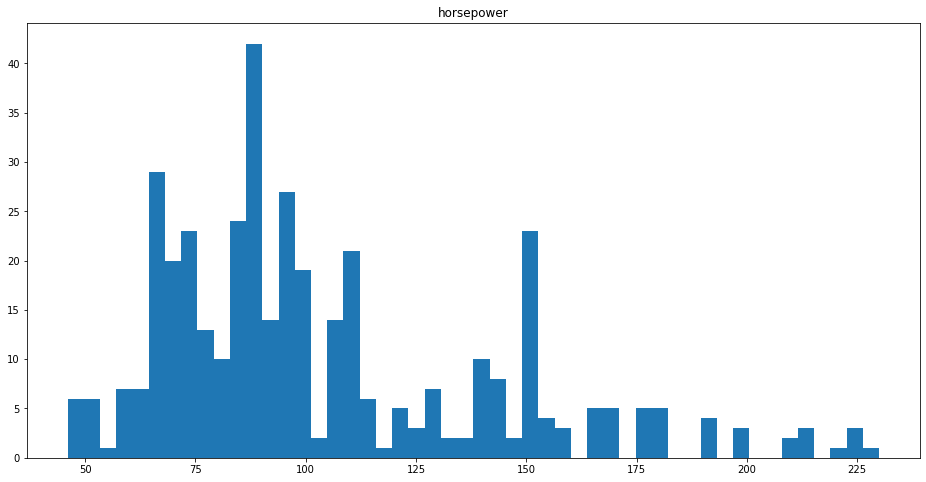

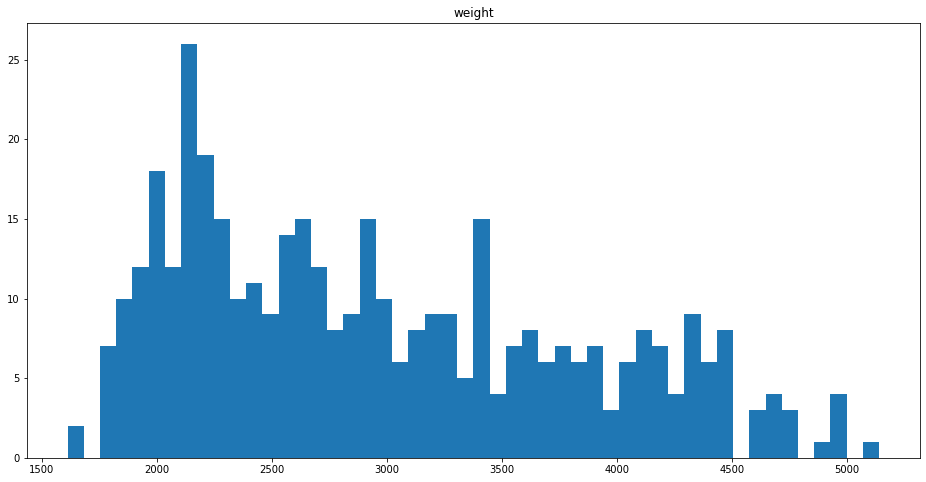

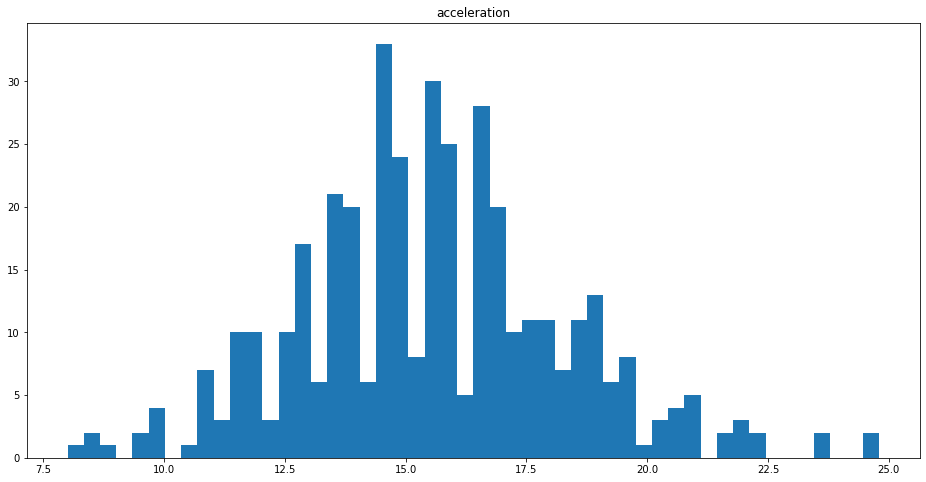

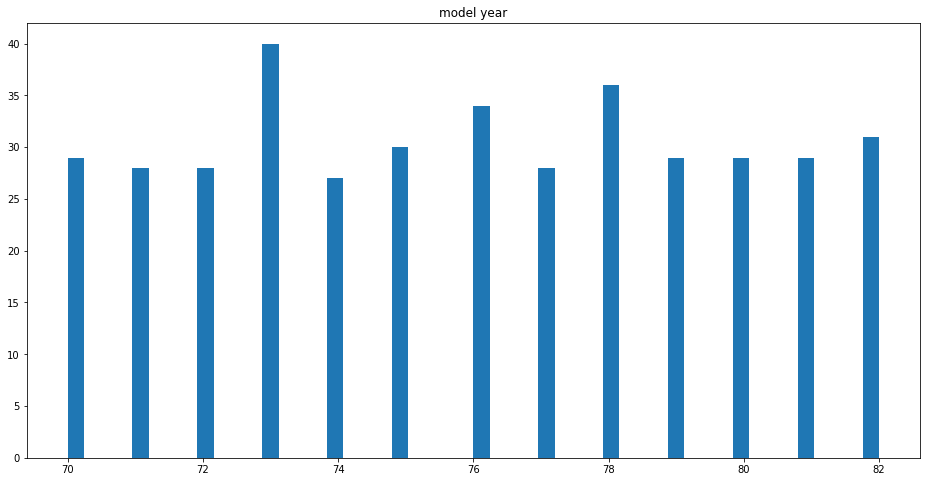

In [223]:
# Checking for outliers in these columns by plotting the boxplot
for x in continuous_columns:
    plt.figure(figsize=(16,8))
    plt.hist(data[x], bins=50, label=x)
    plt.title(x)
    plt.show()

Here, we can see that model year is also a discrete column with only 13 values

In [224]:
continuous_columns

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

In [225]:
# Lets remove it from continuous 
continuous_columns.remove('model year')
continuous_columns

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

In [226]:
# Adding it to discrete
discrete_columns.append('model year')
discrete_columns

['cylinders', 'origin', 'brand', 'name', 'model year']

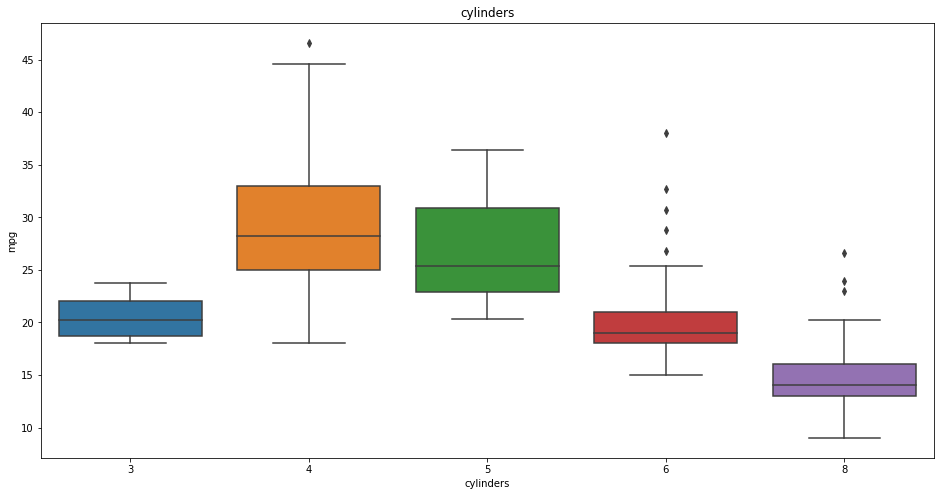

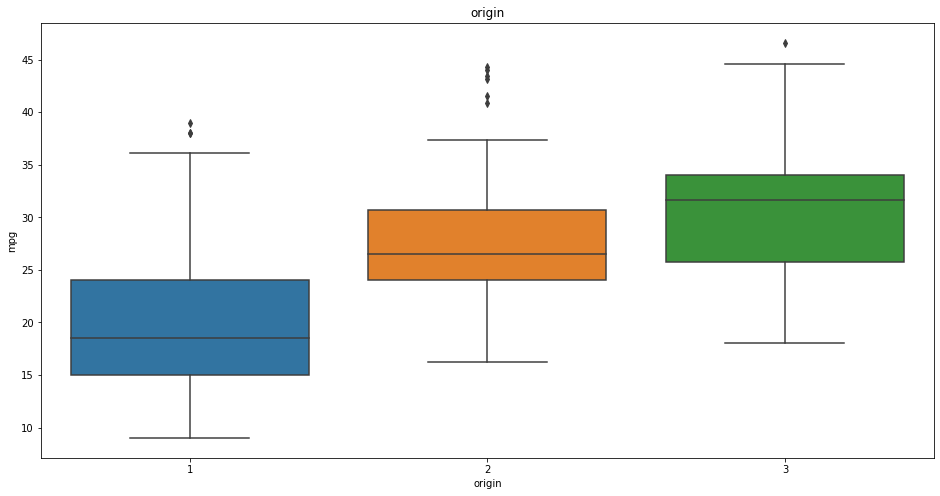

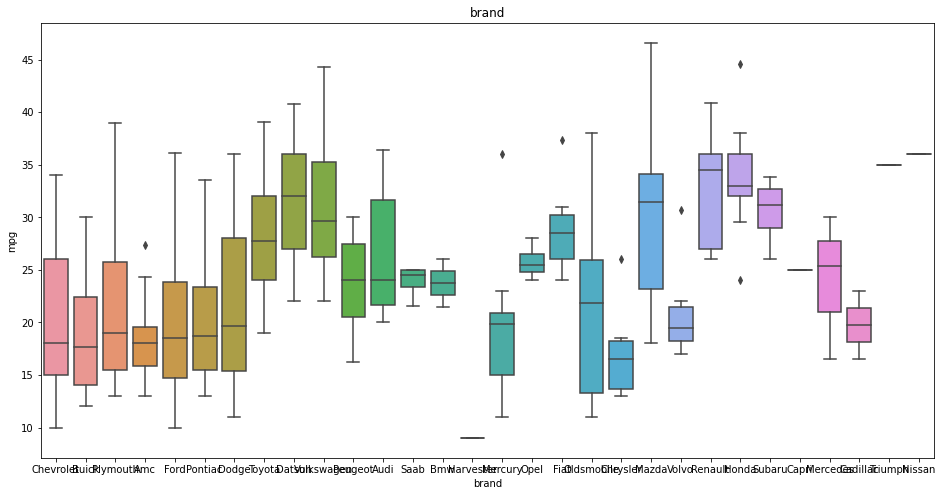

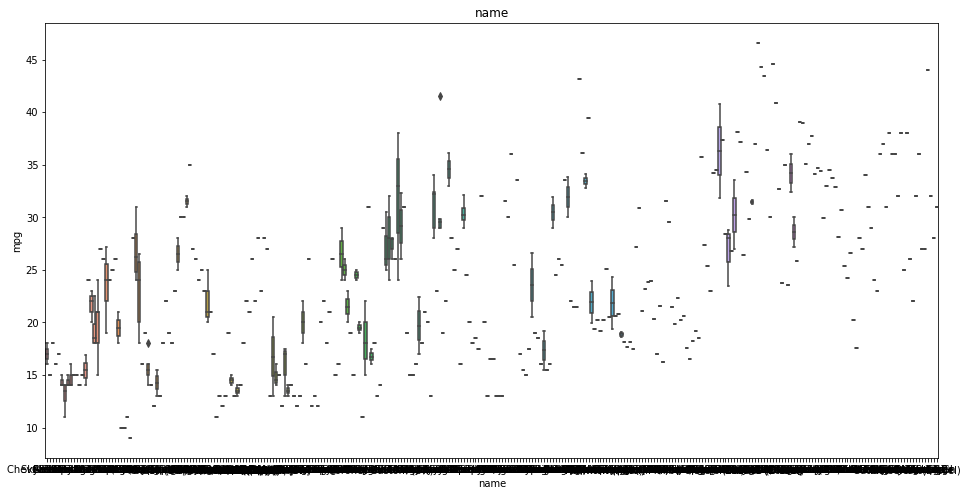

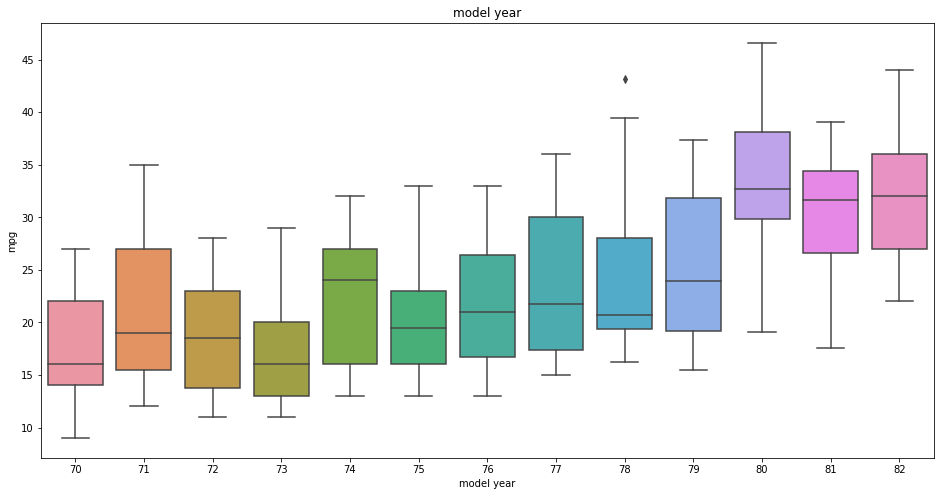

In [227]:
# Checking the influence of labels in the categorical columns/discrete columns
for x in discrete_columns:
    plt.figure(figsize=(16,8))
    sns.boxplot(x=data[x], y=data['mpg'])
    plt.title(x)
    plt.show()

In [228]:
data = data.drop(['name'], axis=1)
discrete_columns.remove("name")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,Amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,Ford


In [229]:
print("Continuous columns :",continuous_columns)
print("Discrete columns :",discrete_columns)

Continuous columns : ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
Discrete columns : ['cylinders', 'origin', 'brand', 'model year']


#### Removing the outliers for continuous columns

In [230]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    return dataframe
    
for col in continuous_columns:
    data = replace_with_thresholds(data, col, q1 = 0.1, q3 = 0.9)

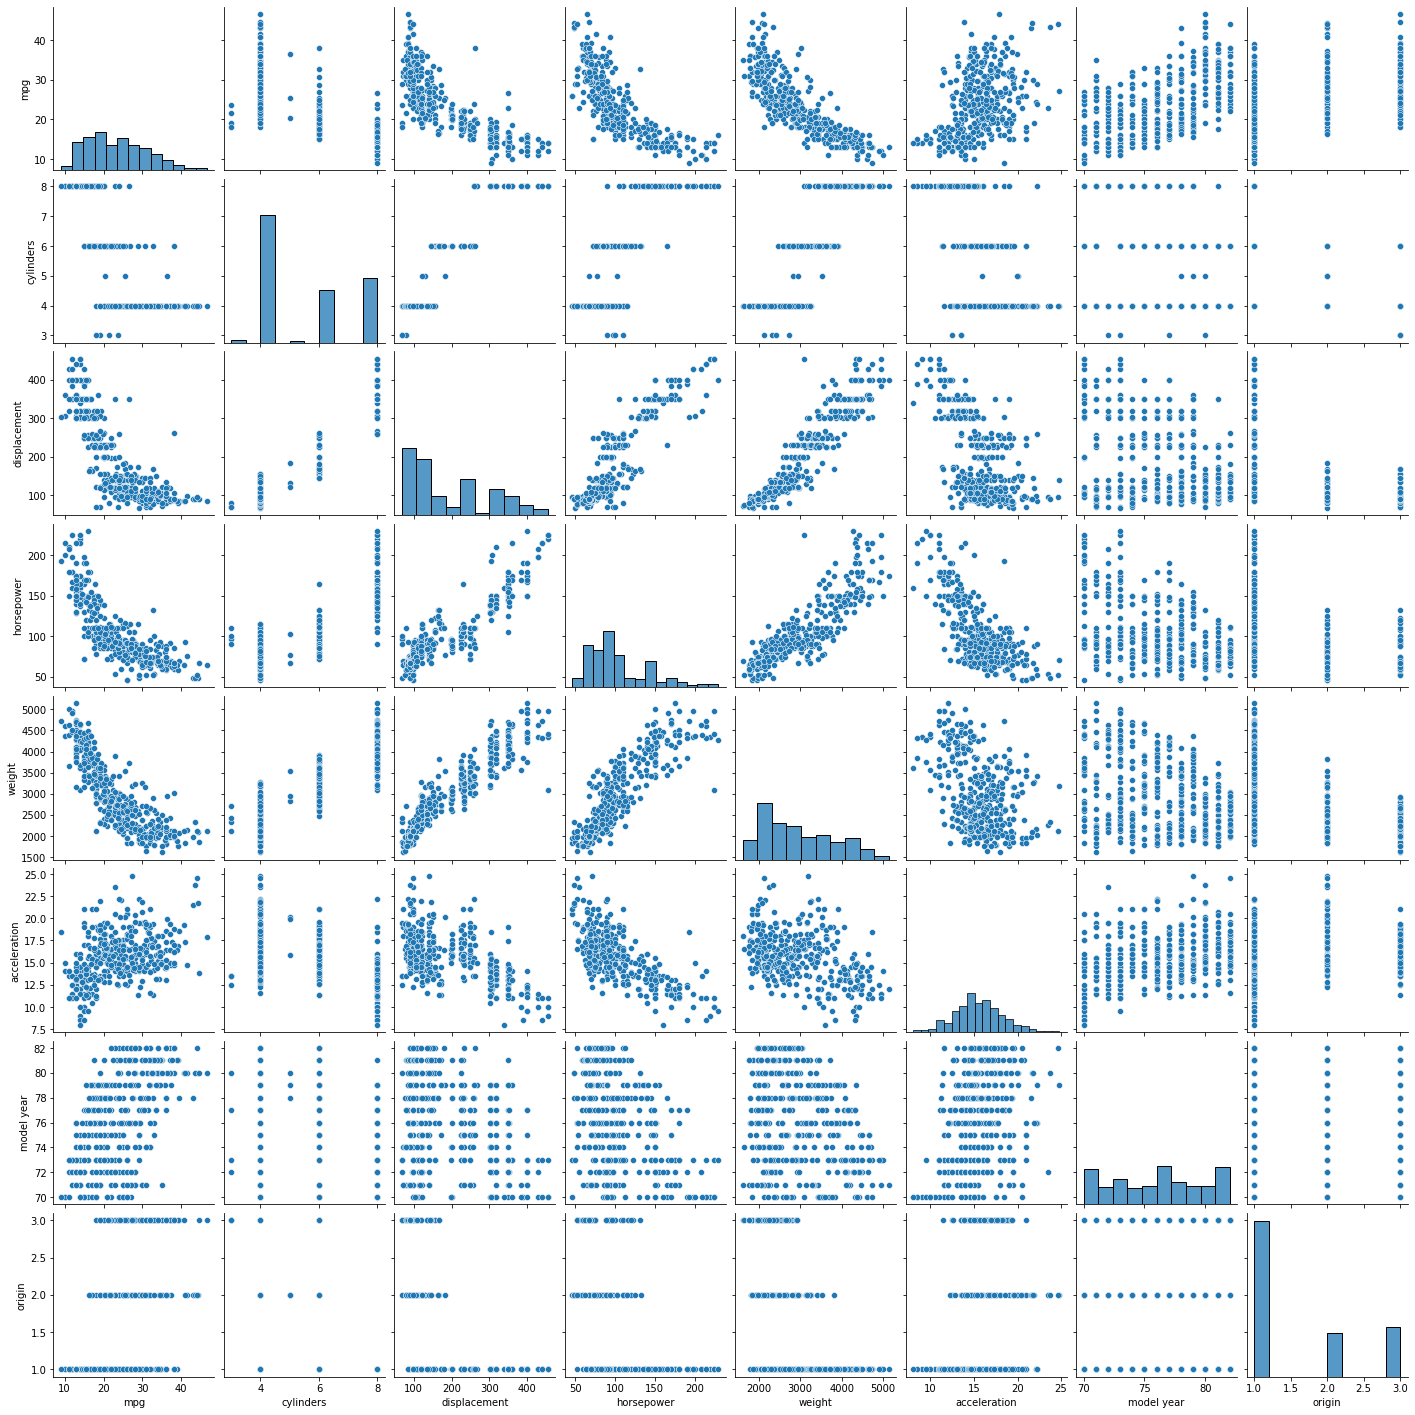

In [231]:
sns.pairplot(data)

#### Transforming the features by converting the categorical columns into one hot vectors

In [232]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe,
                               columns = categorical_cols,
                               drop_first = drop_first)
    return dataframe


ohe_cols = discrete_columns
print('Multiclass Variables: {}'.format(ohe_cols))
data = one_hot_encoder(data, ohe_cols)

Multiclass Variables: ['cylinders', 'origin', 'brand', 'model year']


In [233]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,brand_Amc,brand_Audi,brand_Bmw,brand_Buick,brand_Cadillac,brand_Capri,brand_Chevrolet,brand_Chrysler,brand_Datsun,brand_Dodge,brand_Fiat,brand_Ford,brand_Harvester,brand_Honda,brand_Mazda,brand_Mercedes,brand_Mercury,brand_Nissan,brand_Oldsmobile,brand_Opel,brand_Peugeot,brand_Plymouth,brand_Pontiac,brand_Renault,brand_Saab,brand_Subaru,brand_Toyota,brand_Triumph,brand_Volkswagen,brand_Volvo,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,307.0,130.0,3504.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
data.shape

(398, 56)

#### Understanding the correlation between features

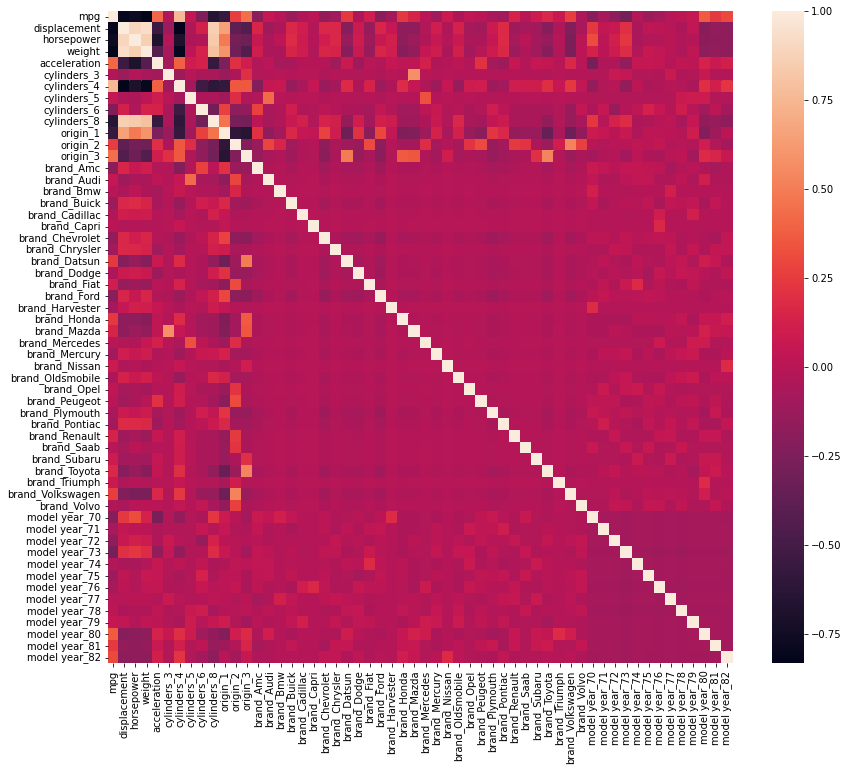

In [235]:
corr = data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr)

#### Defining the independent and dependent variables for the model

In [236]:
y = data['mpg']
X = data.drop(['mpg'], axis=1)

In [237]:
X.shape

(398, 55)

In [238]:
X.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,brand_Amc,brand_Audi,brand_Bmw,brand_Buick,brand_Cadillac,brand_Capri,brand_Chevrolet,brand_Chrysler,brand_Datsun,brand_Dodge,brand_Fiat,brand_Ford,brand_Harvester,brand_Honda,brand_Mazda,brand_Mercedes,brand_Mercury,brand_Nissan,brand_Oldsmobile,brand_Opel,brand_Peugeot,brand_Plymouth,brand_Pontiac,brand_Renault,brand_Saab,brand_Subaru,brand_Toyota,brand_Triumph,brand_Volkswagen,brand_Volvo,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,307.0,130.0,3504.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,350.0,165.0,3693.0,11.5,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,318.0,150.0,3436.0,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,304.0,150.0,3433.0,12.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,302.0,140.0,3449.0,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Splitting the dataset into train test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Applying standard scaling to the train dataset
scaler = StandardScaler()

In [241]:
X_train = scaler.fit_transform(X_train) #scaling features!
X_test = scaler.transform(X_test) # applyting the same transformation to the test features

4. Apply Normalization and Generate Covariance Matrix

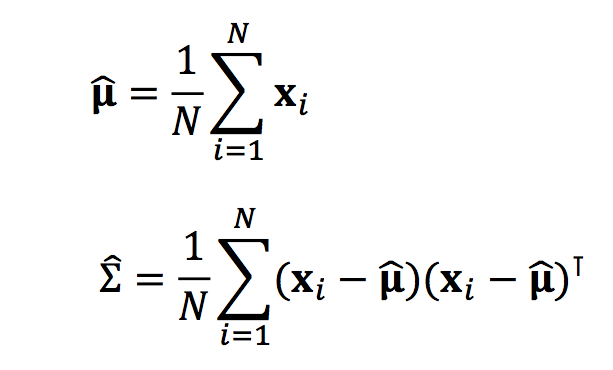

In [242]:
# Generating the covariance matrix from mean 
mean_vec = np.mean(X_train,axis=0)
cov_mat = (X_train-mean_vec).T.dot((X_train-mean_vec))/(X_train.shape[0]-1)
print(cov_mat)
print(cov_mat.shape)

[[ 1.003367    0.88430299  0.92903922 ... -0.22184096 -0.16382188
  -0.14144608]
 [ 0.88430299  1.003367    0.84627719 ... -0.21221342 -0.17189529
  -0.13390475]
 [ 0.92903922  0.84627719  1.003367   ... -0.19413966 -0.15558636
  -0.13846735]
 ...
 [-0.22184096 -0.21221342 -0.19413966 ...  1.003367   -0.08986257
  -0.07073357]
 [-0.16382188 -0.17189529 -0.15558636 ... -0.08986257  1.003367
  -0.07232425]
 [-0.14144608 -0.13390475 -0.13846735 ... -0.07073357 -0.07232425
   1.003367  ]]
(55, 55)


In [243]:
# Getting the eigen values and eigen vectors
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigen values : ", eig_vals)
print("Eigen vectors : ", eig_vecs)

Eigen values :  [ 6.29909414e+00  2.51451609e+00  2.23040265e+00  2.66242798e-02
  4.48956543e-02  1.00377829e-01  1.78339419e+00  3.05241168e-01
  3.49672286e-01  1.64405719e+00  4.06920087e-01  1.53992490e+00
  5.28877852e-01  6.43137158e-01  1.41439247e+00  6.79216904e-01
  1.39149549e+00  7.17001049e-01  1.35000094e+00  1.33086013e+00
  1.32859241e+00  1.30840083e+00  1.29478745e+00  7.57711233e-01
  7.85370573e-01  1.24048700e+00  1.22086394e+00  8.01681706e-01
  8.20746456e-01  8.27709912e-01  8.69545558e-01  8.91960082e-01
  9.34543391e-01  1.14898188e+00  9.54880036e-01  1.13114003e+00
  1.10936385e+00  1.09980499e+00  1.09215461e+00  9.87269525e-01
  1.06220300e+00  1.01439187e+00  1.04583064e+00  1.02095290e+00
  1.02621625e+00  1.02967563e+00  1.03930999e+00  1.03713999e+00
 -2.20745086e-15  2.05526591e-15  1.19090023e-15  4.00017215e-16
 -4.54938747e-16 -1.07498373e-15  0.00000000e+00]
Eigen vectors :  [[-3.81520623e-01  3.80370292e-04  6.16474105e-02 ... -2.88390923e-15
  

5. Apply PCA

In [244]:
# Using the PCA library to reduce dimensions of the dataset
from sklearn.decomposition import PCA 
pca = PCA(n_components = 17) 
reduced_X_train = pca.fit_transform(X_train) 
reduced_X_test = pca.transform(X_test) 
reduced_X_train.shape

(298, 17)

In [245]:
pca.components_

array([[ 3.81520623e-01,  3.45516572e-01,  3.59144722e-01,
        -2.08952686e-01, -2.94775950e-02, -3.30251954e-01,
        -3.06599099e-02,  8.08635307e-02,  3.17540677e-01,
         3.22361090e-01, -1.83721289e-01, -2.15515585e-01,
         5.64934974e-02, -4.52792061e-02, -2.01693303e-02,
         8.56047679e-02,  3.88002038e-02, -5.29338644e-03,
         9.73163767e-02, -1.05193986e-03, -1.15201076e-01,
         6.57965785e-02, -6.33394007e-02,  9.15456185e-02,
         3.82988833e-02, -8.08019675e-02, -6.42072103e-02,
        -2.41648488e-02,  4.35805226e-02,  0.00000000e+00,
         5.19494532e-02, -3.90655084e-02, -5.24386555e-02,
         5.59841925e-02,  5.27246978e-02, -5.24083646e-02,
        -2.15502139e-02, -5.81605773e-02, -1.10171478e-01,
        -2.49303213e-02, -1.19853356e-01, -2.94715033e-02,
         9.96066507e-02,  1.93772442e-02,  3.56015300e-02,
         7.60336041e-02, -2.60996663e-02,  4.03250384e-02,
         1.61009239e-02, -1.20586632e-02, -1.36404163e-0

6. Build the model, summarize it, predict and evaluate the model

In [246]:
scores = pd.DataFrame(columns=["components", "score"])

for i in range(2, 40):
    pca = PCA(n_components = i) 
    reduced_X_train = pca.fit_transform(X_train) 
    reduced_X_test = pca.transform(X_test) 
    
    # Applying linear regression to the target variable
    linear = LinearRegression()
    linear.fit(reduced_X_train, y_train)
    
    # Predicting the X_test
    pred = linear.predict(reduced_X_test)
    scores = scores.append({"components": i, "score": linear.score(reduced_X_test, y_test)}, ignore_index=True)

scores.head()

,components,score
0,2.0,0.702151
1,3.0,0.703692
2,4.0,0.727868
3,5.0,0.730819
4,6.0,0.779110


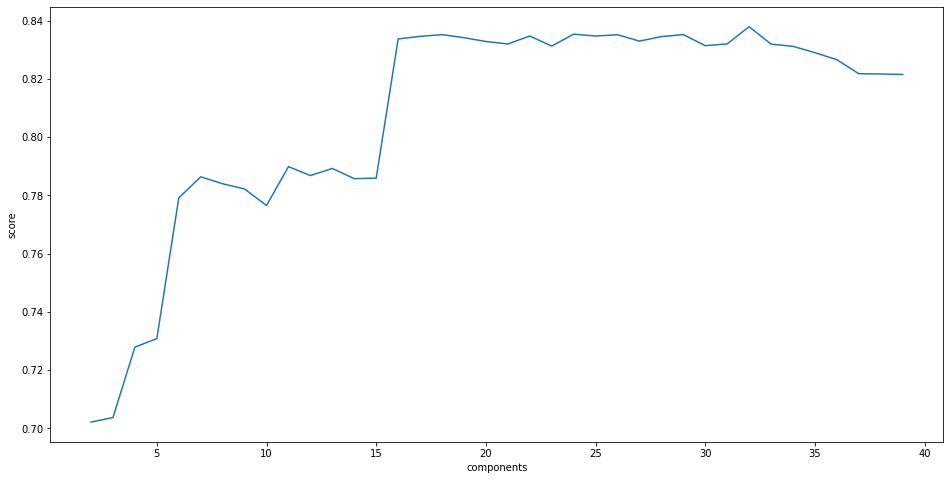

In [247]:
plt.figure(figsize=(16,8))
sns.lineplot(x=scores['components'], y=scores['score'])

In [248]:
# Max score acheived
scores['score'].max()

0.8379389025653949

In [249]:
scores.tail(25)

,components,score
13,15.0,0.785920
14,16.0,0.833724
15,17.0,0.834615
16,18.0,0.835206
17,19.0,0.834154
18,20.0,0.832859
19,21.0,0.832001
20,22.0,0.834738
21,23.0,0.831289
22,24.0,0.835364


6. Prediction

In [250]:
pca = PCA(n_components = 32) 
reduced_X_train = pca.fit_transform(X_train) 
reduced_X_test = pca.transform(X_test) 

# Applying linear regression to the target variable
linear = LinearRegression()
linear.fit(reduced_X_train, y_train)

# Predicting the X_test
pred = linear.predict(reduced_X_test)
linear.score(reduced_X_test, y_test)

0.8379389025653949

7. Final Evaluation

In [251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, pred)
print("Linear Regression MAE:", mae)

Linear Regression MAE: 2.37275127857491


In [252]:
mse = mean_squared_error(y_test, pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 9.202398919155451


In [253]:
print("LR Coef:", linear.coef_)

LR Coef: [-2.64636345 -0.29776798 -0.03826731 -0.76838713  0.60054803 -1.23912815
 -0.31777818  0.20851946  0.23740046  0.3417119   0.34753981 -0.2014326
 -0.23224028 -0.33044993  0.07650305  1.29655751 -0.23553407 -0.08480467
  0.16507732 -0.08158908  0.063088    0.47158683 -0.29046708 -0.10573662
 -0.13357241 -0.21051123 -0.24010712  0.15132411 -0.05924736 -0.19845901
  0.77279261  0.63606366]


### Conclusion -

Through this experiment I understood how to apply PCA and understood how PCA can help us reduce the size of our dataset while retaining the most variant features. I have applied PCA to the Auto-MPG dataset to predict the miles per gallon depending on the various physical features of the car.